# The goal of this simple example is to 

In [8]:
import matplotlib.pyplot as plt
import tifffile as tf

In [12]:
graticule = tf.imread('data/Graticule100x.tif')
cells = tf.imread('data/Ecoli100x.tif')

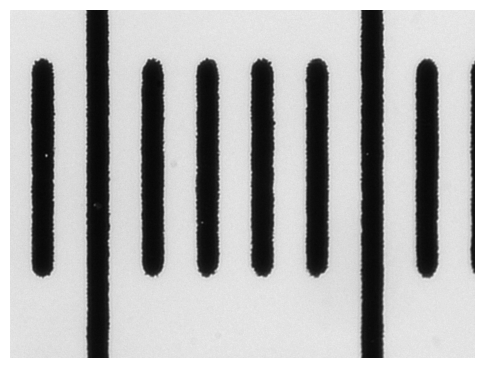

In [13]:
# Display the image inline
plt.figure(figsize=(6,6))  # Adjust figure size if needed
plt.imshow(graticule, cmap="gray")  # Use 'gray' for grayscale images
plt.axis("off")  # Hide axes for better visualization
plt.show()

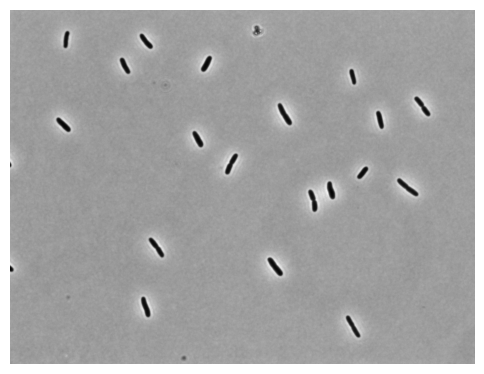

In [15]:
# Display the image inline
plt.figure(figsize=(6,6))  # Adjust figure size if needed
plt.imshow(cells, cmap="gray")  # Use 'gray' for grayscale images
plt.axis("off")  # Hide axes for better visualization
plt.show()

## It is difficult to tell if the graticule is the proper size. Let's create an overlay and that should help

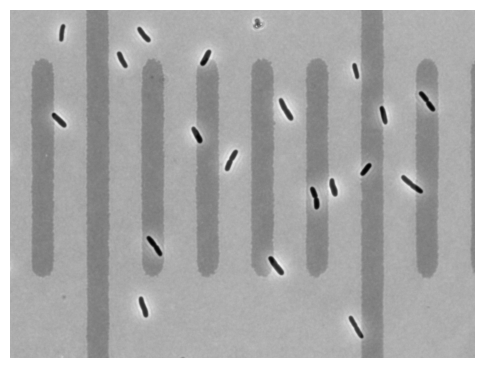

In [16]:
import tifffile as tiff
import numpy as np
import matplotlib.pyplot as plt

# Load images
img1 = tiff.imread('data/Graticule100x.tif')  # Graticule
img2 = tiff.imread('data/Ecoli100x.tif') # E coli

# Identify the larger and smaller image
if img1.shape > img2.shape:
    large_img, small_img = img1, img2
else:
    large_img, small_img = img2, img1

# Compute cropping coordinates
large_h, large_w = large_img.shape[:2]
small_h, small_w = small_img.shape[:2]

crop_h_start = (large_h - small_h) // 2
crop_w_start = (large_w - small_w) // 2

cropped_large_img = large_img[crop_h_start:crop_h_start + small_h, crop_w_start:crop_w_start + small_w]

# Blend images with transparency
alpha = 0.5  # Adjust opacity
overlay = (1 - alpha) * cropped_large_img + alpha * small_img

# Display the result
plt.figure(figsize=(6,6))
plt.imshow(overlay, cmap="gray")
plt.axis("off")
plt.show()
